### Greenhouse Gas Emissions Project

Author: Peter La

Title: Predicting Trends in Greenhouse Gas Emissions

Date: May 4, 2025

Author: Peter la

Purpose: </br>
Unsupervised learning: Explore and analyze greenhouse gas emissions data to reveal hidden patterns or insights without predefined labels. </br>
Data visualization: Visualize emission trends across different countries.

Input: ghg_post_outlier.csv

Outputs:
    

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
import os
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns;

warnings.filterwarnings("ignore")
%matplotlib inline
dpi = 300
sns.set()

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import SpectralClustering

### Import Dataset

In [4]:
df = pd.read_csv(r'/content/drive/MyDrive/ghg_data/ghg_post_outlier.csv')
df.sample(20)

,account_name,account_id,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Third_party_verification,Revenue_USD,ebitda_USD,...,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,country_ghg_avg,country_population_avg,country_gdp_avg
17307,DIC Corporation,4724,2020,Japan,Specialty chemicals,Chemicals,1.577466e+09,Third-party verification or assurance process ...,4.487827e+09,4.569728e+08,...,5.234880e+09,2.986150e+09,3.660864e+08,1.707142e+09,2.248736e+09,Purchased goods and services,1425712.000,1173.044363,1.258077e+08,4.772504e+12
36076,"Kuraray Co., Ltd.",10324,2023,Japan,Other base chemicals,Chemicals,3.054049e+09,No third-party verification or assurance,4.998003e+09,9.768896e+08,...,8.028704e+09,3.317286e+09,1.598144e+08,2.049414e+09,4.711398e+09,Capital goods,97688.000,1173.044363,1.258077e+08,4.772504e+12
36258,Nichirei Corporation,13273,2023,Japan,Other food processing,Food & beverage processing,2.839728e+09,No third-party verification or assurance,4.352582e+09,3.912384e+08,...,3.105005e+09,1.402944e+09,2.998912e+08,6.268928e+08,1.702029e+09,Business travel,1563.000,1173.044363,1.258077e+08,4.772504e+12
37428,Aptiv,4407,2023,United Kingdom,Electrical equipment,Electrical & electronic equipment,2.519279e+10,Third-party verification or assurance process ...,2.005100e+10,2.569000e+09,...,2.442700e+10,1.258300e+10,1.761000e+09,6.787000e+09,1.184400e+10,Investments,2983.000,428.766726,6.734692e+07,3.038320e+12
26957,Telekom Austria AG,18433,2021,Austria,Telecommunications services,"Media, telecommunications & data center services",NaN,Third-party verification or assurance process ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,End of life treatment of sold products,48.000,78.290212,8.976158e+06,4.683449e+11
10549,Nitto Denko Corporation,13375,2019,Japan,Specialty chemicals,Chemicals,6.205590e+09,Third-party verification or assurance process ...,4.742515e+09,7.681472e+08,...,5.900160e+09,1.482861e+09,4.766720e+07,5.760000e+05,4.417299e+09,Business travel,801.000,1173.044363,1.258077e+08,4.772504e+12
16652,IMA SpA,40757,2020,Italy,Industrial machinery,Powered machinery,NaN,Third-party verification or assurance process ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Business travel,31275.430,358.702244,5.936228e+07,2.112506e+12
5618,Veidekke ASA,20149,2018,Norway,Building sub-contractors,Construction,1.217384e+09,Third-party verification or assurance process ...,3.305220e+09,1.114140e+08,...,1.751655e+09,1.381143e+09,1.371750e+08,1.752120e+08,3.705120e+08,Use of sold products,9467.000,40.661893,5.416140e+06,4.736845e+11
43808,City Developments Limited,3420,2023,Singapore,Real estate owners & developers,Land & property ownership & development,4.462861e+09,Third-party verification or assurance process ...,3.656430e+09,9.088554e+08,...,1.793318e+10,1.087406e+10,7.296540e+09,9.099686e+09,7.059115e+09,Downstream leased assets,13118.010,68.003802,5.696062e+06,4.386441e+11
18086,"Otsuka Holdings Co., Ltd.",31907,2020,Japan,Pharmaceuticals,Biotech & pharma,1.533472e+10,Third-party verification or assurance process ...,9.106086e+09,1.969773e+09,...,1.681796e+10,4.764000e+09,2.530349e+09,1.446906e+09,1.205396e+10,Capital goods,85119.000,1173.044363,1.258077e+08,4.772504e+12


### Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44079 entries, 0 to 44078
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                44079 non-null  object 
 1   account_id                  44079 non-null  int64  
 2   Year                        44079 non-null  int64  
 3   incorporated_country        44079 non-null  object 
 4   Primary activity            44079 non-null  object 
 5   Primary sector              44079 non-null  object 
 6   Market_Cap_USD              37591 non-null  float64
 7   Third_party_verification    44055 non-null  object 
 8   Revenue_USD                 37799 non-null  float64
 9   ebitda_USD                  37799 non-null  float64
 10  grossProfit_USD             37799 non-null  float64
 11  netIncome_USD               37799 non-null  float64
 12  cashAndCashEquivalents_USD  37799 non-null  float64
 13  shortTermInvestments_USD    377

In [6]:
df = df.drop('account_name', axis=1)

In [7]:
df = df.drop('account_id', axis=1)

In [8]:
df = df.drop('Third_party_verification', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44079 entries, 0 to 44078
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        44079 non-null  int64  
 1   incorporated_country        44079 non-null  object 
 2   Primary activity            44079 non-null  object 
 3   Primary sector              44079 non-null  object 
 4   Market_Cap_USD              37591 non-null  float64
 5   Revenue_USD                 37799 non-null  float64
 6   ebitda_USD                  37799 non-null  float64
 7   grossProfit_USD             37799 non-null  float64
 8   netIncome_USD               37799 non-null  float64
 9   cashAndCashEquivalents_USD  37799 non-null  float64
 10  shortTermInvestments_USD    37799 non-null  float64
 11  longTermInvestments_USD     37799 non-null  float64
 12  totalAssets_USD             37799 non-null  float64
 13  totalLiabilities_USD        377

In [10]:
categorical_columns = ['incorporated_country', 'Primary activity', 'Primary sector', 'Scope_3_emissions_type']

In [11]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44079 entries, 0 to 44078
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        44079 non-null  int64  
 1   incorporated_country        44079 non-null  int64  
 2   Primary activity            44079 non-null  int64  
 3   Primary sector              44079 non-null  int64  
 4   Market_Cap_USD              37591 non-null  float64
 5   Revenue_USD                 37799 non-null  float64
 6   ebitda_USD                  37799 non-null  float64
 7   grossProfit_USD             37799 non-null  float64
 8   netIncome_USD               37799 non-null  float64
 9   cashAndCashEquivalents_USD  37799 non-null  float64
 10  shortTermInvestments_USD    37799 non-null  float64
 11  longTermInvestments_USD     37799 non-null  float64
 12  totalAssets_USD             37799 non-null  float64
 13  totalLiabilities_USD        377

In [13]:
df.describe()

,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Revenue_USD,ebitda_USD,grossProfit_USD,netIncome_USD,cashAndCashEquivalents_USD,...,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,country_ghg_avg,country_population_avg,country_gdp_avg
count,44079.000000,44079.000000,44079.000000,44079.000000,3.759100e+04,3.779900e+04,3.779900e+04,3.779900e+04,3.779900e+04,3.779900e+04,...,3.779900e+04,3.779900e+04,3.779900e+04,3.779900e+04,3.779900e+04,44079.000000,4.407900e+04,43990.000000,4.407900e+04,4.407900e+04
mean,2020.691055,26.555412,66.727943,21.678123,4.213381e+10,1.550745e+10,3.166308e+09,7.154089e+09,1.522890e+09,6.245170e+09,...,6.555740e+10,4.921059e+10,1.647025e+10,1.205342e+10,1.140095e+10,7.686086,7.541206e+05,2020.043630,1.911141e+08,7.490542e+12
std,1.702396,12.186467,38.445461,15.316251,2.281083e+11,2.674943e+10,7.375009e+09,1.458088e+10,4.880889e+09,3.178626e+10,...,2.240724e+11,1.967959e+11,8.159429e+10,3.438719e+10,2.274114e+10,5.680386,3.302482e+06,2692.445035,2.930367e+08,8.835235e+12
min,2018.000000,0.000000,0.000000,0.000000,2.449135e+06,-1.711368e+10,-9.289400e+10,-2.699258e+10,-1.680588e+10,-9.736200e+09,...,0.000000e+00,0.000000e+00,-1.187800e+10,0.000000e+00,-1.073900e+10,0.000000,2.000000e-03,1.981020,6.453412e+04,7.583005e+09
25%,2019.000000,19.000000,36.000000,11.000000,2.869319e+09,2.993792e+09,4.154140e+08,9.290000e+08,1.197610e+08,3.564000e+08,...,5.155110e+09,2.608935e+09,8.980000e+07,9.701640e+08,1.831418e+09,3.000000,2.313000e+03,412.740377,5.172400e+07,1.553189e+12
50%,2021.000000,22.000000,69.000000,15.000000,8.135037e+09,7.527046e+09,1.141344e+09,2.388233e+09,4.490000e+08,9.460800e+08,...,1.283300e+10,7.357664e+09,4.866112e+08,3.253740e+09,4.474547e+09,7.000000,1.880000e+04,1173.044363,1.258077e+08,4.185212e+12
75%,2022.000000,40.000000,99.000000,30.000000,2.539696e+10,1.705968e+10,2.941382e+09,6.388800e+09,1.285750e+09,2.580339e+09,...,3.553965e+10,2.197100e+10,2.151878e+09,9.387576e+09,1.111567e+10,13.000000,1.590010e+05,3265.433643,3.315243e+08,4.772504e+12
max,2023.000000,41.000000,132.000000,56.000000,6.283032e+12,3.943280e+11,1.305410e+11,1.740620e+11,9.980300e+10,7.408340e+11,...,3.875393e+12,3.547515e+12,1.528885e+12,7.756765e+11,3.278780e+11,16.000000,5.199799e+07,13105.528962,1.410932e+09,2.383859e+13


In [14]:
df.to_csv('/content/drive/MyDrive/ghg_data/prepped_ghg_post_outlier.csv', index=False)

In [15]:
path = '/content/drive/MyDrive/ghg_data/'

### Exploratory Data Analysis

In [16]:
correlation_matrix = df.corr()
correlation_matrix

,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Revenue_USD,ebitda_USD,grossProfit_USD,netIncome_USD,cashAndCashEquivalents_USD,...,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,country_ghg_avg,country_population_avg,country_gdp_avg
Year,1.000000,0.008779,-0.005042,0.001983,0.019901,0.046018,0.019500,0.018593,0.027666,0.016051,...,-0.001497,-0.004400,-0.033021,0.019739,0.016273,0.012066,-0.002219,0.010786,0.010250,0.008886
incorporated_country,0.008779,1.000000,-0.004827,-0.018525,0.034719,0.163859,0.158383,0.172748,0.157161,0.053527,...,0.082387,0.068329,0.069726,0.103904,0.126844,-0.011439,0.017445,0.152371,-0.075158,0.475840
Primary activity,-0.005042,-0.004827,1.000000,0.104120,0.048052,0.038431,0.035148,-0.001896,-0.023934,-0.182591,...,-0.197773,-0.185876,-0.171051,-0.128607,-0.070329,-0.001545,-0.018003,-0.024553,-0.020145,-0.017333
Primary sector,0.001983,-0.018525,0.104120,1.000000,0.055384,-0.022643,-0.033662,-0.068528,-0.040495,-0.074354,...,-0.086859,-0.081188,-0.074270,-0.067458,-0.065483,0.001811,0.011635,-0.043798,-0.023095,-0.028834
Market_Cap_USD,0.019901,0.034719,0.048052,0.055384,1.000000,0.335047,0.444332,0.343089,0.481369,0.061144,...,0.096828,0.079414,0.086443,0.129812,0.262406,-0.004173,0.021508,0.077631,0.063450,0.108339
Revenue_USD,0.046018,0.163859,0.038431,-0.022643,0.335047,1.000000,0.745652,0.807533,0.693545,0.196982,...,0.323844,0.293384,0.258973,0.413216,0.600536,-0.005935,0.112621,0.194649,0.106349,0.282908
ebitda_USD,0.019500,0.158383,0.035148,-0.033662,0.444332,0.745652,1.000000,0.750782,0.896584,0.234139,...,0.365627,0.322592,0.292390,0.464231,0.703453,-0.007202,0.068523,0.177995,0.096702,0.256194
grossProfit_USD,0.018593,0.172748,-0.001896,-0.068528,0.343089,0.807533,0.750782,1.000000,0.739289,0.360192,...,0.545893,0.510130,0.484086,0.549606,0.746066,-0.008676,0.043227,0.164195,0.072473,0.267535
netIncome_USD,0.027666,0.157161,-0.023934,-0.040495,0.481369,0.693545,0.896584,0.739289,1.000000,0.273935,...,0.381150,0.346595,0.331754,0.412623,0.651333,-0.009315,0.044993,0.179881,0.102761,0.251715
cashAndCashEquivalents_USD,0.016051,0.053527,-0.182591,-0.074354,0.061144,0.196982,0.234139,0.360192,0.273935,1.000000,...,0.855005,0.821379,0.681959,0.749908,0.591167,-0.010439,-0.016576,0.031967,0.007743,0.061831


Emission Trends Over Time: Line chart illustrating average emissions per year.

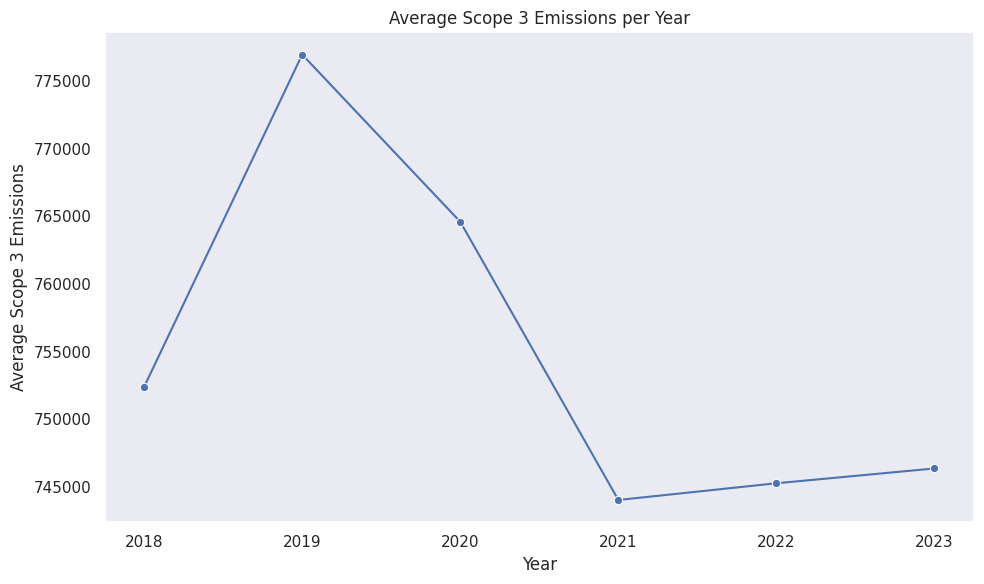

In [17]:
# Calculate average emissions per year
avg_emissions_per_year = df.groupby('Year')['Scope_3_emissions_amount'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_emissions_per_year, x='Year', y='Scope_3_emissions_amount', marker='o')
plt.title('Average Scope 3 Emissions per Year')
plt.xlabel('Year')
plt.ylabel('Average Scope 3 Emissions')
plt.grid(False)
plt.tight_layout()
plot_filename = 'linechart.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()


There is a gradual increase in average emissions over time from 2018 to 2023.

The trend suggests rising emissions intensity on average, despite potential variations in company size or sector.

This upward pattern could reflect economic recovery, increased reporting transparency, or growth in high-emission sectors.

Let's look at the distribution of Scope 3 Emissions with a histogram to understand the distribution and potential skewness.

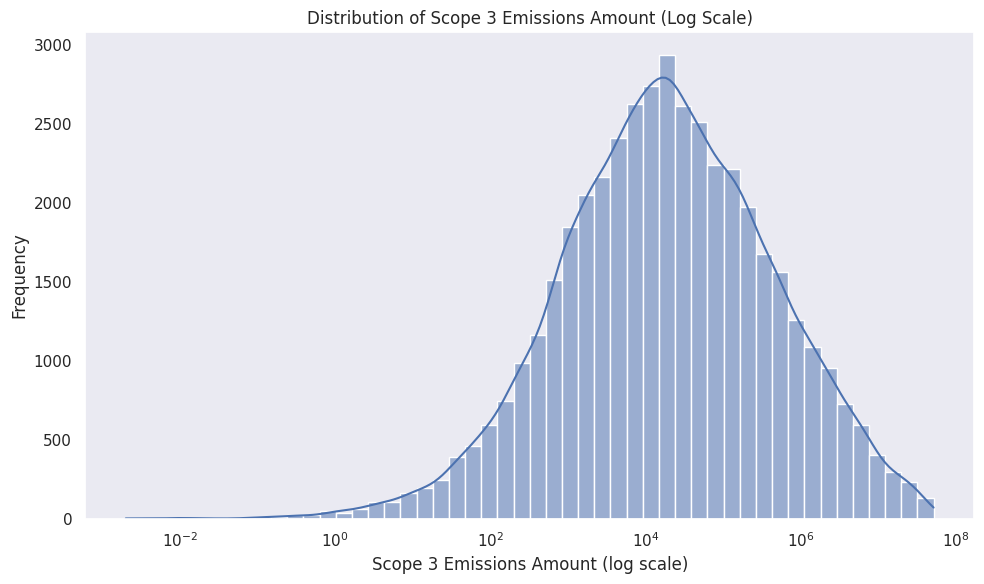

In [19]:
# Histogram for Scope 3 Emissions distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Scope_3_emissions_amount'], bins=50, kde=True, log_scale=True)
plt.title('Distribution of Scope 3 Emissions Amount (Log Scale)')
plt.xlabel('Scope 3 Emissions Amount (log scale)')
plt.ylabel('Frequency')
plt.grid(False)
plt.tight_layout()
plot_filename = 'emissiondistribution.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()

Linear scale is useful when you're interested in absolute values and the spread is moderate.

However, for datasets like this with large variation, the log scale is more informative for highlighting underlying relationships.

Text(0, 0.5, 'Scope 3 Emissions (log scale)')

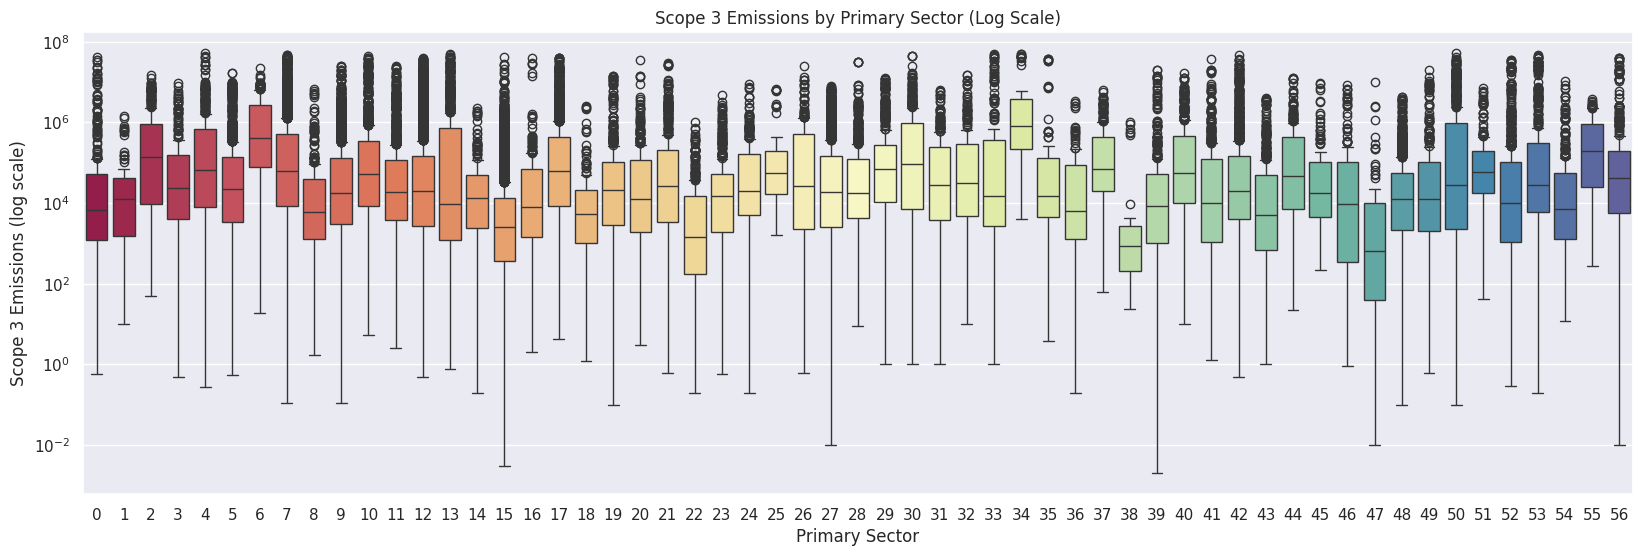

In [20]:
# Visualize potential factors influencing Scope 3 emissions

# Setup subplots
fig, axes = plt.subplots(figsize=(20, 6))

# Boxplot of emissions by Primary Sector
sns.boxplot(x='Primary sector', y='Scope_3_emissions_amount', data=df, palette="Spectral")
axes.set_yscale('log')
axes.set_title('Scope 3 Emissions by Primary Sector (Log Scale)')
axes.set_xlabel('Primary Sector')
axes.set_ylabel('Scope 3 Emissions (log scale)')

In [21]:
plot_filename = 'boxplots.png'
fig.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)

Let's break down the emissions by sector over time to pinpoint specific contributors.

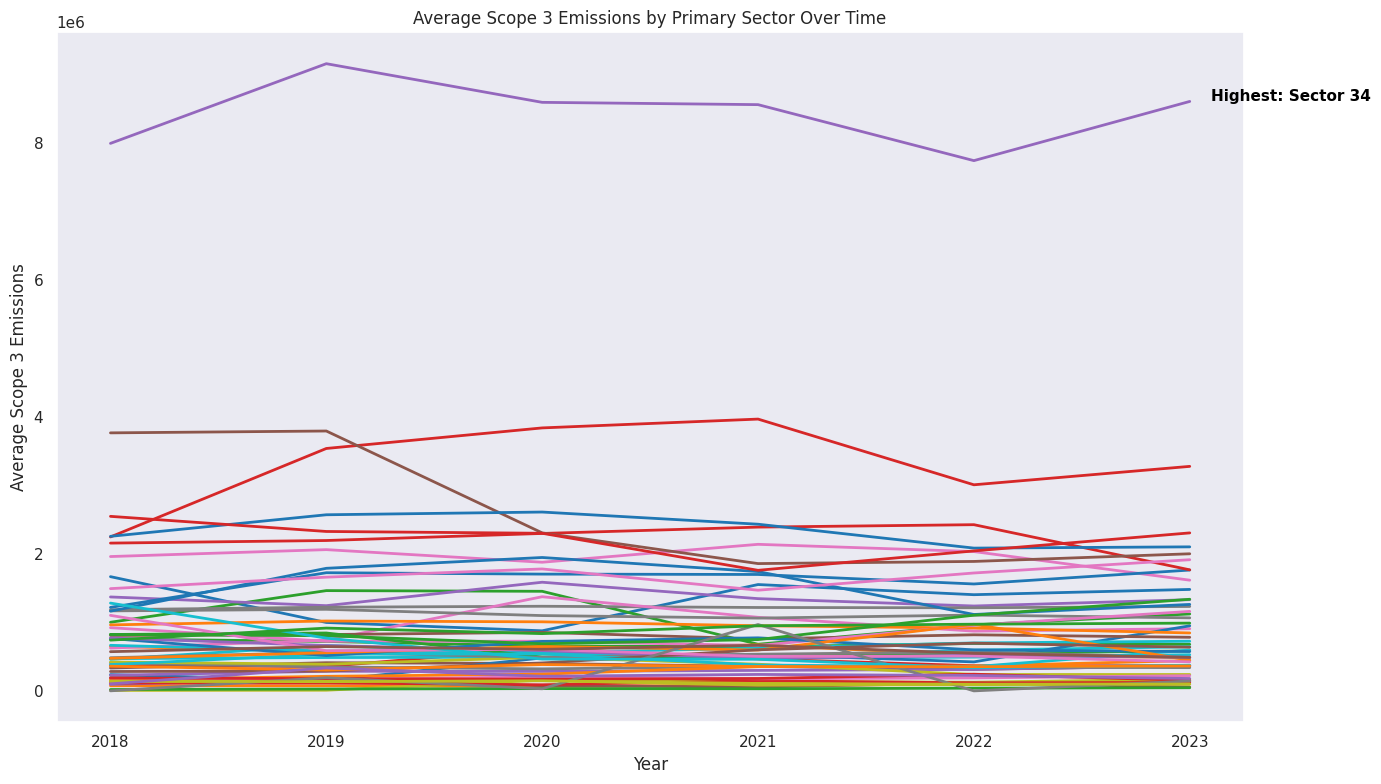

In [22]:
# Group by year and primary sector to calculate average emissions per sector over time
sector_emissions_over_time = df.groupby(['Year', 'Primary sector'])['Scope_3_emissions_amount'].mean().reset_index()
sector_avg_emissions = sector_emissions_over_time.groupby('Primary sector')['Scope_3_emissions_amount'].mean()
highest_emission_sector = sector_avg_emissions.idxmax()

# Plot the line chart with multiple lines, one for each sector
plt.figure(figsize=(14, 8))
plot = sns.lineplot(
    data=sector_emissions_over_time,
    x='Year',
    y='Scope_3_emissions_amount',
    hue='Primary sector',
    palette='tab10',
    linewidth=2,
    legend=False  # Remove the legend
)

# Annotate the sector with the highest average emissions
top_sector_data = sector_emissions_over_time[sector_emissions_over_time['Primary sector'] == highest_emission_sector]
top_latest_point = top_sector_data[top_sector_data['Year'] == top_sector_data['Year'].max()]
for _, row in top_latest_point.iterrows():
    plt.text(row['Year'] + 0.1, row['Scope_3_emissions_amount'], f'Highest: Sector {int(row["Primary sector"])}',
             color='black', fontsize=11, weight='bold')

plt.title('Average Scope 3 Emissions by Primary Sector Over Time')
plt.xlabel('Year')
plt.ylabel('Average Scope 3 Emissions')
plt.grid(False)
plt.tight_layout()
plot_filename = 'emissionsbysector.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()


The plot identifies a sector with the highest average emission rate over time. Looking back at the original dataset before preprocessing, sector 34 is oil & gas processing (refineries).

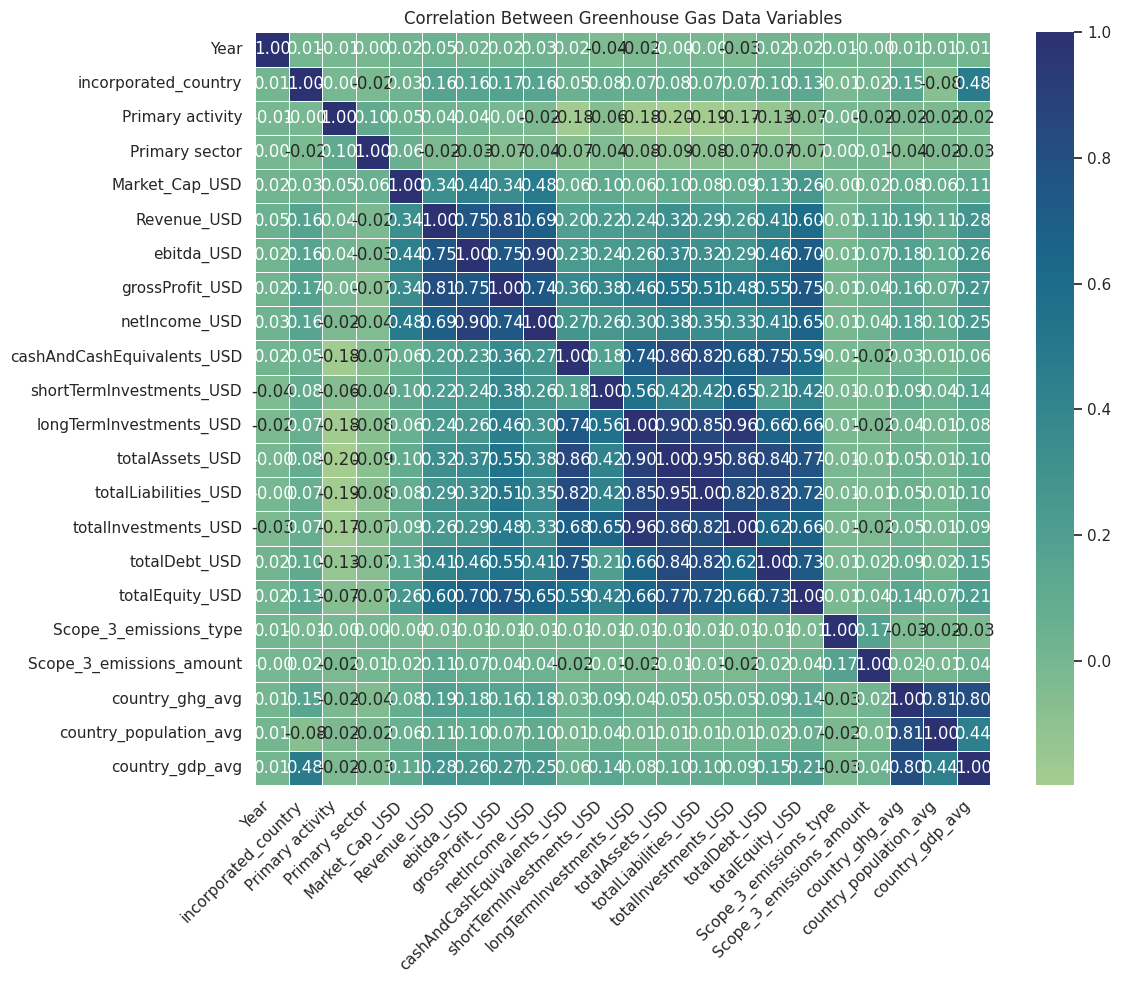

In [23]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', linewidths=0.5)
plt.title('Correlation Between Greenhouse Gas Data Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plot_filename = 'heatmap_allvariables.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()


Let's create a heatmap to specifically show correlations among financial metrics and emissions.

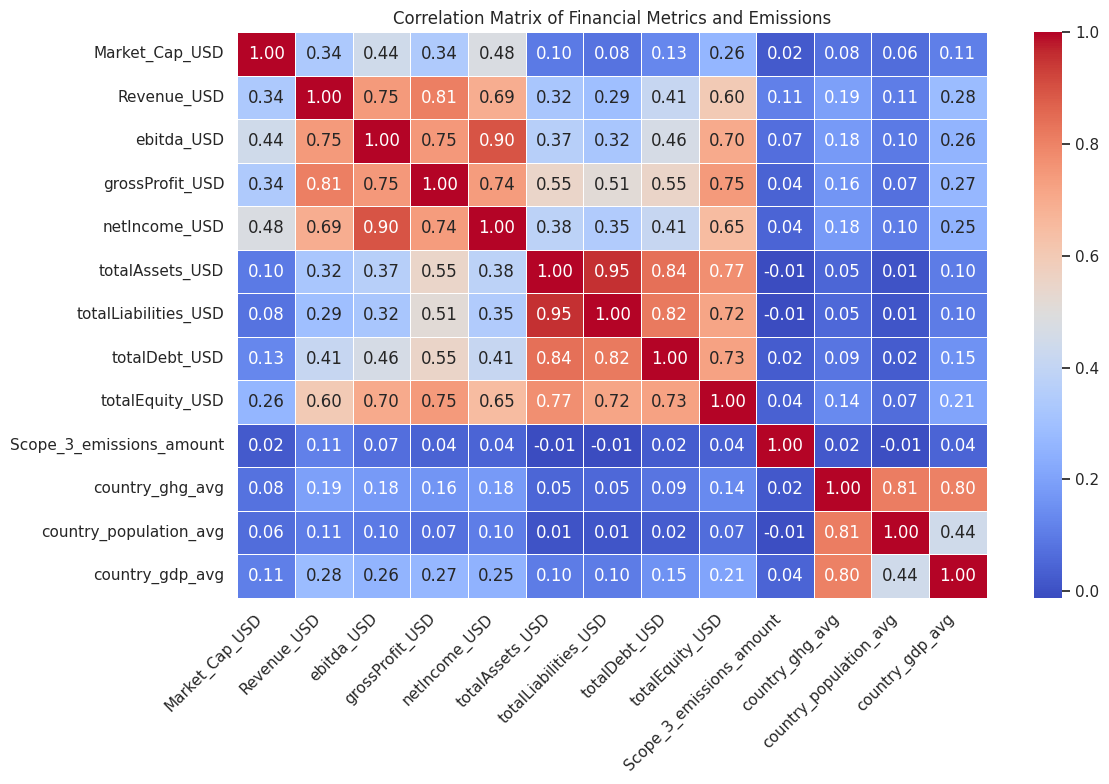

In [24]:
# Numerical columns for correlation analysis
numerical_columns = [
    'Market_Cap_USD', 'Revenue_USD', 'ebitda_USD', 'grossProfit_USD',
    'netIncome_USD', 'totalAssets_USD', 'totalLiabilities_USD',
    'totalDebt_USD', 'totalEquity_USD', 'Scope_3_emissions_amount',
    'country_ghg_avg', 'country_population_avg', 'country_gdp_avg'
]

# Compute correlation matrix
correlation_matrix_2 = df[numerical_columns].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Financial Metrics and Emissions')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plot_filename = 'financialmatrix.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()


Here's the correlation matrix visualized as a heatmap, illustrating relationships among greenhouse gas emissions, country statistics, and financial metrics:

Financial Metrics:

Strong positive correlations among financial metrics like ebitda_USD, netIncome_USD, grossProfit_USD, and Revenue_USD, indicating expected financial interdependencies.

totalAssets_USD, totalLiabilities_USD, and totalDebt_USD are also strongly interrelated, as anticipated.

Emissions (Scope_3_emissions_amount):

Emissions have notably weak correlations with most financial metrics, suggesting emissions might be influenced by factors beyond direct financial size or profitability alone.

Country-Level Metrics:

country_ghg_avg strongly correlates with both country_population_avg and country_gdp_avg, indicating that larger populations and economies typically emit more greenhouse gases, as expected.

With the appropriate variables, we will proceed with clustering analysis to identify groups of countries or companies based on their emissions profile.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [26]:
# Select relevant features for clustering
features = [
    'Scope_3_emissions_amount', 'Market_Cap_USD', 'Revenue_USD', 'netIncome_USD',
    'totalAssets_USD', 'totalLiabilities_USD', 'totalDebt_USD',
    'country_population_avg', 'country_gdp_avg', 'country_ghg_avg'
]

# Drop rows with missing values in selected features
ghg_cluster_data = df[features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ghg_cluster_data)

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply K-means clustering with an arbitrary number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [27]:
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

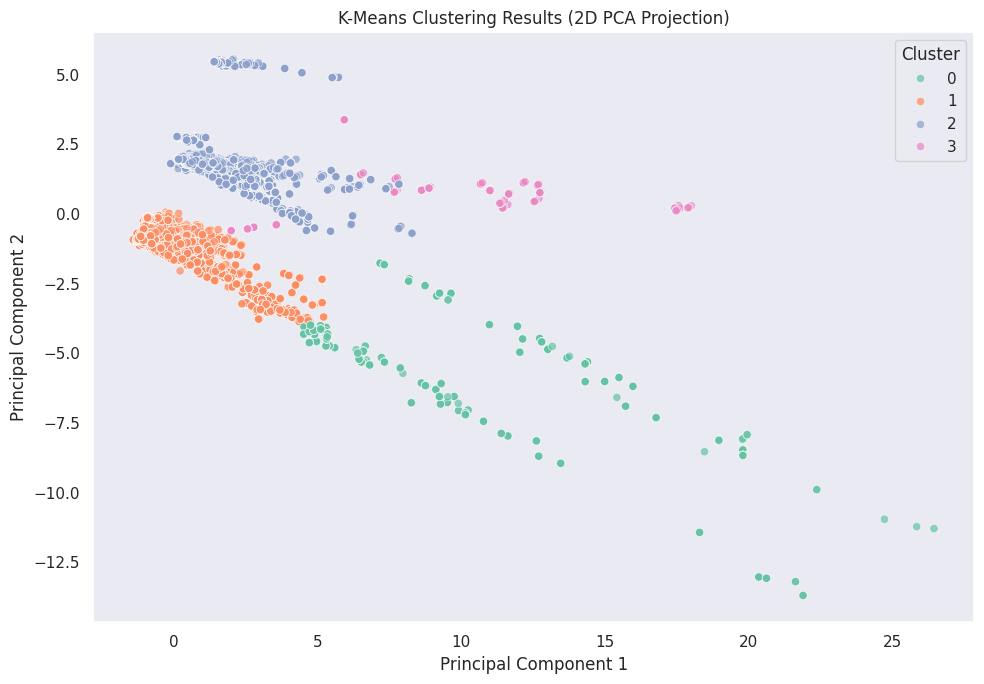

In [29]:
# Prepare data for visualization
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Visualize PCA results with cluster labels
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('K-Means Clustering Results (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(False)
plt.tight_layout()
plot_filename = 'kmeansclustering.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [30]:
# Add the cluster labels back to the original (filtered) data
ghg_cluster_data_with_labels = ghg_cluster_data.copy()
ghg_cluster_data_with_labels['Cluster'] = clusters

In [31]:
# Calculate average values for each cluster to visualize cluster profiles
cluster_summary = ghg_cluster_data_with_labels.groupby('Cluster').mean()

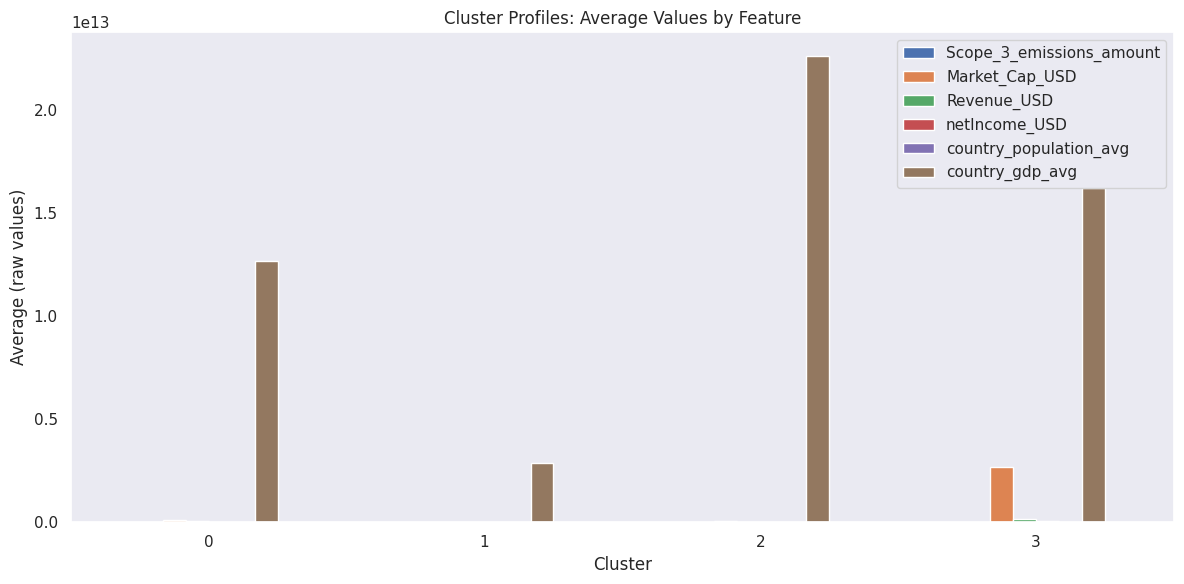

In [33]:
# Visualize cluster centers for selected features
selected_features = [
    'Scope_3_emissions_amount', 'Market_Cap_USD', 'Revenue_USD',
    'netIncome_USD', 'country_population_avg', 'country_gdp_avg'
]

# Bar chart of cluster centers
cluster_summary[selected_features].plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Profiles: Average Values by Feature')
plt.ylabel('Average (raw values)')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plot_filename = 'kmeansclustering.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
sum_sq = []
for n in range(1, 15):
    print('Calculating for ',n,' clusters')

    model = KMeans(n_clusters=n, random_state=42)
    model.fit(X)
    sum_sq.append(model.score(X))

In [ ]:
plt.plot(range(1,14), np.diff(sum_sq), 'bx-')

In [ ]:
score = metrics.silhouette_score(X, preds)
score

In [ ]:
for n in range (2,15):
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(X)

    preds = model.predict(X)
    score = metrics.silhouette_score(X, preds)
    print('Silhouette score for ',n,' clusters: ',score)

In [ ]:
score = metrics.silhouette_score(X, preds)
score